#### Tutorial used for guidance: https://www.tensorflow.org/tutorials/images/classification

## Set up Environment

In [1]:
# Install the necessary packages
!pip3 install numpy
!pip3 install scikit-learn
!pip3 install imutils
!pip3 install matplotlib
!pip3 install tf-nightly

In [2]:
# Import the necessary packages needed for model training
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Load the Dataset

In [3]:
# Define the constants
batch_size = 32
img_height = 180
img_width = 180
dataset_path = '/home/srinivassriram/Desktop/Rescue_Pi_Code/Rescue_Pi_Code/Dataset2/'

In [4]:
# Initialize the training dataset
train_dls = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 613 files belonging to 3 classes.
Using 491 files for training.


In [5]:
# Initialize the validation dataset
val_dls = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 613 files belonging to 3 classes.
Using 122 files for validation.


In [6]:
# Display the class names
class_names = train_dls.class_names
print(class_names)

['Crying', 'Fighting', 'Normal']


## Visualize the Data

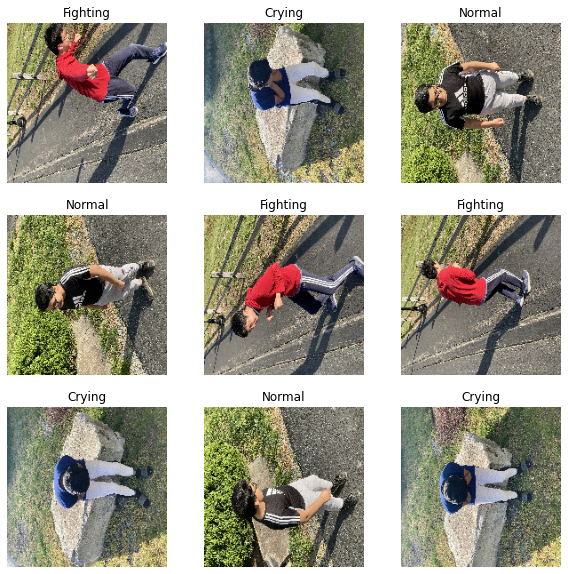

In [7]:
# Plot the images using matplotlib
plt.figure(figsize=(10, 10))
for images, labels in train_dls.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
# Display the batches that our model will be trained off of
for image_batch, labels_batch in train_dls:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## Configure the dataset for optimal training performance

In [9]:
# Configure dataset using cache and prefetch to disable I/O blocking during training
AUTOTUNE = tf.data.AUTOTUNE

train_dls = train_dls.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dls = val_dls.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
# Normalize the dataset to make the RGB values easier to process
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_dls = train_dls.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dls))
first_image = image_batch[0]

## Build and Train the Model

In [11]:
# Define constants
num_classes = 3
epochs=10

In [12]:
# Build our Sequential Learning Model
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
# Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# Quick summary of our model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [15]:
# Fit our model on our dataset
hist = model.fit(
  train_dls,
  validation_data=val_dls,
  epochs=epochs
)

Epoch 1/10
16/16 [==============================] - 5s 276ms/step - loss: 1.2051 - accuracy: 0.6741 - val_loss: 0.2437 - val_accuracy: 1.0000
Epoch 2/10
16/16 [==============================] - 3s 206ms/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 9.0170e-05 - val_accuracy: 1.0000
Epoch 3/10
16/16 [==============================] - 3s 199ms/step - loss: 1.7803e-04 - accuracy: 1.0000 - val_loss: 5.5029e-05 - val_accuracy: 1.0000
Epoch 4/10
16/16 [==============================] - 3s 200ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9918
Epoch 5/10
16/16 [==============================] - 3s 200ms/step - loss: 0.0710 - accuracy: 0.9837 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 6/10
16/16 [==============================] - 3s 202ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 4.6914e-05 - val_accuracy: 1.0000
Epoch 7/10
16/16 [==============================] - 3s 199ms/step - loss: 1.6146e-05 - accuracy: 1.0000 - val_loss: 1.8751e-06 - val

## Visualize the Model's Performance!

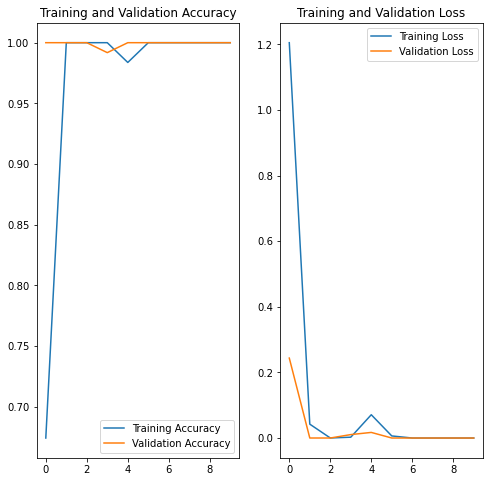

In [16]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save the model

In [17]:
# Save the model to the json file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [18]:
# Save the weights to a bin file
model.save_weights("weights.bin")